In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline 

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Load datasets

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/biafra.csv', encoding='utf-8')
df2 = pd.read_csv('/content/gdrive/MyDrive/bfra.csv', encoding='utf-8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   tweets      500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
#remove pattern in the dataset
def remove_pattern(text):
  text = re.findall(pattern, df)
  for word in text:
    df = re.sub(word, "", df)
  
  return df
  df

In [ ]:
df.head()

,Unnamed: 0,tweets
0,0,RT @steve_hanke: Sleepy Buhari’s govt has arre...
1,1,RT @ChinasaNworu: Buhari preaching self determ...
2,2,"RT @SDiaso: ""For Nigeria Government to Abduct ..."
3,3,"RT @BiafranTweets: Hello Lovers of Freedom, as..."
4,4,"RT @oluchisystem: My Life Is Under Threat, Bar..."


In [ ]:
#create clean function
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'$', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'0-9[A-Za-z]+', '', text)
  text = text.lower()
 


  return text
  
df['tweets'] = df['tweets'].apply(cleantxt)

df.head()

,Unnamed: 0,tweets
0,0,_hanke: sleepy buhari’s govt has arrested nnam...
1,1,: buhari preaching self determination in 201...
2,2,": ""for nigeria government to abduct mazi nnamd..."
3,3,": hello lovers of freedom, as you can see, bia..."
4,4,": my life is under threat, barr. ejiofor, coun..."


In [ ]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,tweets,clean_text
0,0,_hanke: sleepy buhari’s govt has arrested nnam...,hanke sleepy buhari s govt has arrested nnam...
1,1,: buhari preaching self determination in 201...,buhari preaching self determination in ...
2,2,": ""for nigeria government to abduct mazi nnamd...",for nigeria government to abduct mazi nnamd...
3,3,": hello lovers of freedom, as you can see, bia...",hello lovers of freedom as you can see bia...
4,4,": my life is under threat, barr. ejiofor, coun...",my life is under threat barr ejiofor coun...


In [ ]:
#remove stop words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Unnamed: 0,tweets,clean_text
0,0,_hanke: sleepy buhari’s govt has arrested nnam...,hanke sleepy buhari govt arrested nnamdi kanu ...
1,1,: buhari preaching self determination in 201...,buhari preaching self determination always fro...
2,2,": ""for nigeria government to abduct mazi nnamd...",nigeria government abduct mazi nnamdi kanu onl...
3,3,": hello lovers of freedom, as you can see, bia...",hello lovers freedom biafra trending what tren...
4,4,": my life is under threat, barr. ejiofor, coun...",life under threat barr ejiofor counsel biafra ...


In [ ]:
#tokenization
tokenized = df['clean_text'].apply(lambda x: x.split())
tokenized.head()

0    [hanke, sleepy, buhari, govt, arrested, nnamdi...
1    [buhari, preaching, self, determination, alway...
2    [nigeria, government, abduct, mazi, nnamdi, ka...
3    [hello, lovers, freedom, biafra, trending, wha...
4    [life, under, threat, barr, ejiofor, counsel, ...
Name: clean_text, dtype: object

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized.head()

0    [hank, sleepi, buhari, govt, arrest, nnamdi, k...
1    [buhari, preach, self, determin, alway, frown,...
2    [nigeria, govern, abduct, mazi, nnamdi, kanu, ...
3    [hello, lover, freedom, biafra, trend, what, t...
4    [life, under, threat, barr, ejiofor, counsel, ...
Name: clean_text, dtype: object

In [ ]:
df['clean_text'] = tokenized
df.head()

,Unnamed: 0,tweets,clean_text
0,0,_hanke: sleepy buhari’s govt has arrested nnam...,"[hank, sleepi, buhari, govt, arrest, nnamdi, k..."
1,1,: buhari preaching self determination in 201...,"[buhari, preach, self, determin, alway, frown,..."
2,2,": ""for nigeria government to abduct mazi nnamd...","[nigeria, govern, abduct, mazi, nnamdi, kanu, ..."
3,3,": hello lovers of freedom, as you can see, bia...","[hello, lover, freedom, biafra, trend, what, t..."
4,4,": my life is under threat, barr. ejiofor, coun...","[life, under, threat, barr, ejiofor, counsel, ..."


In [ ]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,tweets,clean_text
0,0,_hanke: sleepy buhari’s govt has arrested nnam...,hanke sleepy buhari s govt has arrested nnam...
1,1,: buhari preaching self determination in 201...,buhari preaching self determination in ...
2,2,": ""for nigeria government to abduct mazi nnamd...",for nigeria government to abduct mazi nnamd...
3,3,": hello lovers of freedom, as you can see, bia...",hello lovers of freedom as you can see bia...
4,4,": my life is under threat, barr. ejiofor, coun...",my life is under threat barr ejiofor coun...


In [ ]:
#create a function to get subjectivity

from textblob import TextBlob

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity'] = df['tweets'].apply(getsubjectivity)
df['polarity'] = df['tweets'].apply(getpolarity)


#show new dataframe
df

,Unnamed: 0,tweets,clean_text,subjectivity,polarity
0,0,_hanke: sleepy buhari’s govt has arrested nnam...,hanke sleepy buhari s govt has arrested nnam...,0.000000,0.000000
1,1,: buhari preaching self determination in 201...,buhari preaching self determination in ...,0.000000,0.000000
2,2,": ""for nigeria government to abduct mazi nnamd...",for nigeria government to abduct mazi nnamd...,1.000000,0.000000
3,3,": hello lovers of freedom, as you can see, bia...",hello lovers of freedom as you can see bia...,0.000000,0.000000
4,4,": my life is under threat, barr. ejiofor, coun...",my life is under threat barr ejiofor coun...,0.000000,0.000000
...,...,...,...,...,...
495,495,: please be notified about this. is the lawy...,please be notified about this is the lawy...,0.000000,0.000000
496,496,: the leader of indigenous people of biafra di...,the leader of indigenous people of biafra di...,0.066667,0.033333
497,497,"abomination,the chi of biafra land will strik...",abomination the chi of biafra land will strik...,0.450000,-0.100000
498,498,": biafra , oduduwa ,middle belt, stop lamentin...",biafra oduduwa middle belt stop lamentin...,0.000000,0.000000


In [ ]:
df[200:210]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity
200,200,: is and always will be the leader of the ind...,is and always will be the leader of the ind...,0.0,0.0
201,201,: is and always will be the leader of the ind...,is and always will be the leader of the ind...,0.0,0.0
202,202,: buhari preaching self determination in 201...,buhari preaching self determination in ...,0.0,0.0
203,203,president muhammadu buhari speaks about biaf...,president muhammadu buhari speaks about biaf...,0.0,0.0
204,204,": nigeria: my life is under threat, counsel to...",nigeria my life is under threat counsel to...,0.5,0.5
205,205,: we’re calling on all indigenous people of bi...,we re calling on all indigenous people of bi...,0.0,0.0
206,206,president muhammadu buhari speaks about biafr...,president muhammadu buhari speaks about biafr...,0.0,0.0
207,207,: uk is not our home biafra is our home giveus...,uk is not our home biafra is our home giveus...,0.8,0.4
208,208,: onye chi ya na egbughị onweghi ihe ndị irò g...,onye chi ya na egbugh onweghi ihe nd ir g...,0.0,0.0
209,209,: they are offering nnamdi kanu oil well in ds...,they are offering nnamdi kanu oil well in ds...,0.0,0.0


In [ ]:
#sentiment text function
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
#add sentiment column to dataframe
df['sentiment'] = df['polarity'].apply(getSentiment)
df[400:410]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment
400,400,": ""for nigeria government to abduct mazi nnamd...",for nigeria government to abduct mazi nnamd...,1.0,0.0,Neutral
401,401,: is and always will be the leader of the ind...,is and always will be the leader of the ind...,0.0,0.0,Neutral
402,402,: buhari preaching self determination in 201...,buhari preaching self determination in ...,0.0,0.0,Neutral
403,403,: this gentle man doesn't deserve this humili...,this gentle man doesn t deserve this humili...,0.8,0.2,Positive
404,404,: no visible federal character in igbo land. n...,no visible federal character in igbo land n...,0.0,0.0,Neutral
405,405,: we’re calling on all indigenous people of bi...,we re calling on all indigenous people of bi...,0.0,0.0,Neutral
406,406,": when a trader speaks against , check it well...",when a trader speaks against check it well...,0.5,-0.5,Negative
407,407,": ""joe igbokwe does not know or understand tha...",joe igbokwe does not know or understand tha...,0.0,0.0,Neutral
408,408,_unit: ‼‼‼red alert‼‼‼information reaching ipo...,unit red alert information reaching ipo...,0.1,-0.1,Negative
409,409,: break news : i can no longer handle the case...,break news i can no longer handle the case...,0.0,0.0,Neutral


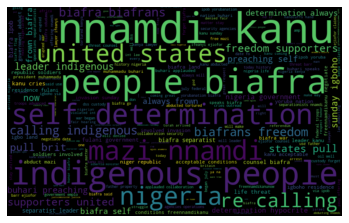

In [ ]:
#Visualization and exploration of dataset
allWords = ' '.join( [sentence for sentence in df['clean_text']] )

from wordcloud import WordCloud
wordCloud = WordCloud(width = 800, height = 500, random_state=42, max_font_size=100).generate(allWords)

#plot wordcloud
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

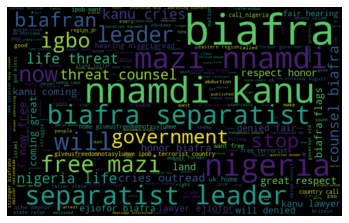

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

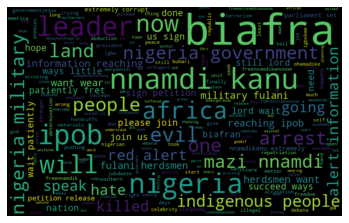

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

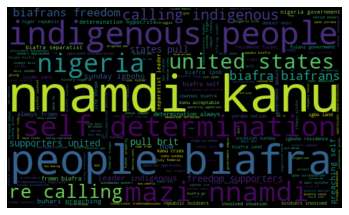

In [ ]:
#plot wordcloud 
allWords = ' '.join( [twts for twts in df['clean_text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state=23, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

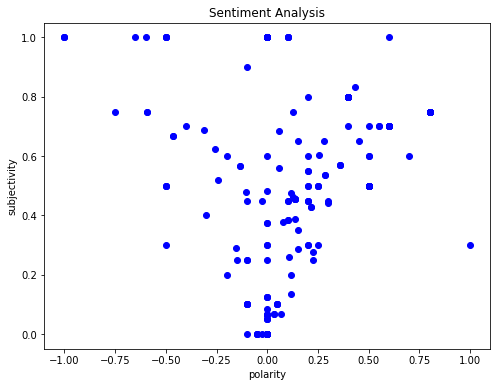

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

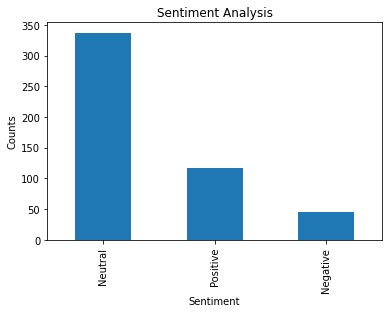

In [ ]:
#plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#creating a label for the tweets
def createlabel(score):
  if score < 0:
    return -1
  elif score >0 and score < 1:
    return 1
  else:
    return 0


#add label top dataframe
df['label'] = df['polarity'].apply(createlabel)
df[200:215]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment,label
200,200,: is and always will be the leader of the ind...,is and always will be the leader of the ind...,0.0,0.0,Neutral,0
201,201,: is and always will be the leader of the ind...,is and always will be the leader of the ind...,0.0,0.0,Neutral,0
202,202,: buhari preaching self determination in 201...,buhari preaching self determination in ...,0.0,0.0,Neutral,0
203,203,president muhammadu buhari speaks about biaf...,president muhammadu buhari speaks about biaf...,0.0,0.0,Neutral,0
204,204,": nigeria: my life is under threat, counsel to...",nigeria my life is under threat counsel to...,0.5,0.5,Positive,1
205,205,: we’re calling on all indigenous people of bi...,we re calling on all indigenous people of bi...,0.0,0.0,Neutral,0
206,206,president muhammadu buhari speaks about biafr...,president muhammadu buhari speaks about biafr...,0.0,0.0,Neutral,0
207,207,: uk is not our home biafra is our home giveus...,uk is not our home biafra is our home giveus...,0.8,0.4,Positive,1
208,208,: onye chi ya na egbughị onweghi ihe ndị irò g...,onye chi ya na egbugh onweghi ihe nd ir g...,0.0,0.0,Neutral,0
209,209,: they are offering nnamdi kanu oil well in ds...,they are offering nnamdi kanu oil well in ds...,0.0,0.0,Neutral,0


In [ ]:
#input split and feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vect.fit_transform(df['clean_text'])

In [ ]:
bow_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# bow[0].toarray()

In [ ]:
bow

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.30) 

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(350, 573) (350,) (150, 573) (150,)


In [ ]:
#model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# model training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# testing
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.8533333333333334

In [ ]:
# use probabilty to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

#f1_score(y_test, pred)
accuracy_score(y_test, pred)

0.08

In [ ]:
pred_prob[0]

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

BNmodel = BernoulliNB(alpha = 2)
SVCmodel = LinearSVC()
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)


In [ ]:
# model training BNB
model1 = BernoulliNB()
model1.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# testing BNB
model1.fit(x_test, y_test)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)

0.7866666666666666

In [ ]:
# model training LSVC
model2 = LinearSVC()
model2.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# testing LSVC
model2.fit(x_test, y_test)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)

1.0

In [ ]:
# second split
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
x_train = train['clean_text']
x_test = test['clean_text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vector = TfidfVectorizer(use_idf=True)

In [ ]:
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def models(model):
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_pred, x_test['sentiment'])
  recall = recall_score(y_pred, x_test['sentiment'].pos_label='negative')
  precision = precision_score(y_pred, test['sentiment'].pos_label='negative')

  return (accuracy, recall, precision)